# King County Dataset Linear Regression Model 12

### Adjustments for this model:
    Start with getting rid of 'id', 'zipcode', 'lat', 'long'
    Then deal with the NaN's in 'view', 'yr_renovated', 'waterfront', and 'sqft_basement'
    Change "?" in 'sqft_basement', change it to a float.
    Take care of outlier in 'bedrooms', 
    Are there outliers in theres?  'sqft_living','sqft_lot', 'sqft_living15', 'sqft_lot15'
    Deal with the 'date' feature?  - I still don't know how!
    Bin categorical data: 'view', 'grade', 'sqft_basement', 'yr_renovated', 'waterfront', 'condition'
    Lot Transform right skewed data: 'sqft_above', 'sqft_living','sqft_lot', 'sqft_living15', 'sqft_lot15' 
    Max/Min: None.
    Standardization: 'sqft_above', 'sqft_living','sqft_lot','sqft_living15', 'sqft_lot15'
   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv("kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [2]:
# This time I'm going to try to not adjust the original, just a new series called king_features
king_features = pd.read_csv("kc_house_data.csv")

In [3]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
king_features.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
# Change "?" in 'sqft_basement' to '0';
king_features.sqft_basement = king_features.sqft_basement.replace(to_replace = '?', value = '0')

In [6]:
# Account for missing data in 'waterfront', 'view', 'yr_renovated';
king_features.waterfront.fillna(value=king_features.waterfront.median(), inplace = True)
king_features.view.fillna(value=king_features.view.median(), inplace = True)
king_features.yr_renovated.fillna(value=king_features.yr_renovated.median(), inplace = True)
king_features.sqft_basement.fillna(value=king_features.sqft_basement.median(), inplace = True)


In [7]:
# Change outlier '33' to '3' in 'bedrooms';
king_features.at[15856,'bedrooms'] = 3

KeyboardInterrupt: 

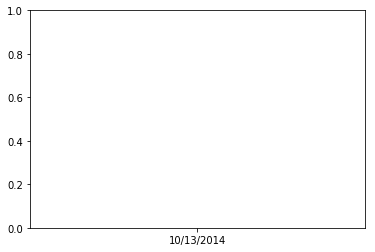

In [8]:
# Look at 'date' object.
data.date.hist()

In [435]:
# Change 'date' feature to float;  Still not working!
import datetime as dt
king_features['date'] = pd.to_datetime(king_features.date)

In [436]:
# Other code to try;  Still not working!
# Change 'date' feature to float;
#import datetime as dt

#Run this code first and then change it!
#data["date"] = pd.to_datetime(data["date"], format = "%m/%d/%Y")

# I want day first, but it won't work this way.
#data["date"] = pd.to_datetime(data["date"], format = "%d/%m/%Y")

In [438]:
# Change 'sqft_basement' from an object to a float:
king_features['sqft_basement'] = king_features['sqft_basement'].astype(float)

In [439]:
king_features = king_features.drop(["id", 'lat', 'long', 'zipcode'], axis=1)

In [ ]:
# Before
data.bathrooms.hist()

In [441]:
king_features.bathrooms.mean()

2.1158262721674306

In [442]:
king_features.bathrooms.std()*4 + king_features.bathrooms.mean()

5.191763458778315

In [443]:
king_features = king_features[king_features.bathrooms < 6]

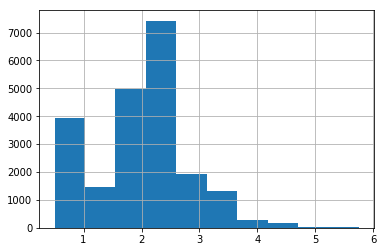

In [444]:
# After
king_features.bathrooms.hist()

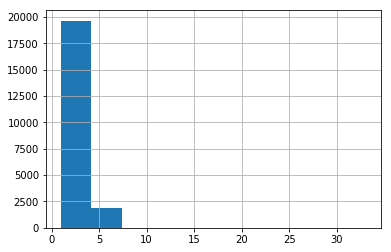

In [445]:
# Before
data.bedrooms.hist()

In [446]:
king_features.bedrooms.mean()

3.3699087160001855

In [447]:
king_features.bedrooms.mean()+king_features.bedrooms.std()*4

6.9744593071255

In [448]:
king_features = king_features[king_features.bedrooms < 7]

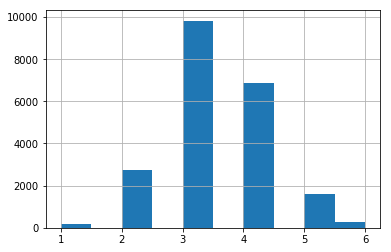

In [449]:
# After
king_features.bedrooms.hist()

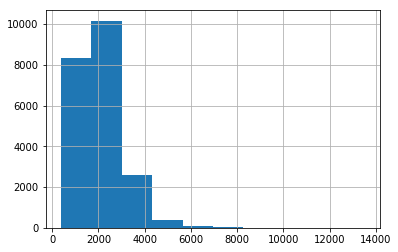

In [450]:
# Before
data.sqft_living.hist()

In [451]:
king_features.sqft_living.mean()

2071.8918881248837

In [452]:
king_features.sqft_living.mean()+king_features.sqft_living.std()*4

5664.4807431384925

In [453]:
len(king_features.loc[king_features["sqft_living"] > 5664])

84

In [454]:
king_features = king_features[king_features.sqft_living < 5664]

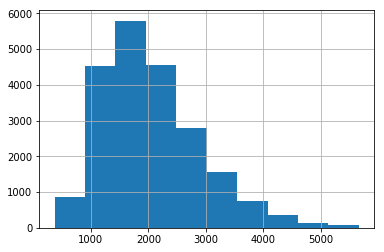

In [455]:
# After
king_features.sqft_living.hist()

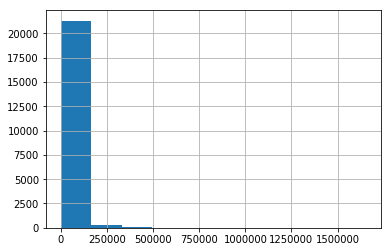

In [456]:
# Before
data.sqft_lot.hist()

In [457]:
king_features.sqft_lot.mean()

14887.626072761193

In [458]:
king_features.sqft_lot.mean()+king_features.sqft_lot.std()*4

178003.00353716832

In [459]:
# Number of homes that have more than a 1 acre lot or 43560 sqft.
len(king_features.loc[king_features["sqft_lot"] > 178007])

282

In [460]:
king_features = king_features[king_features.sqft_lot < 178007]

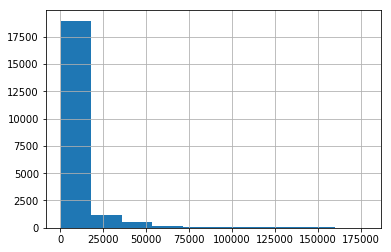

In [461]:
# After
king_features.sqft_lot.hist()

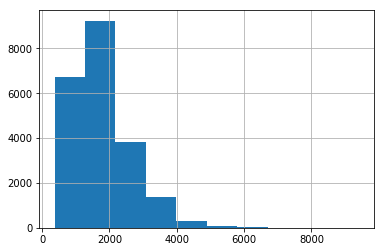

In [462]:
# Before
data.sqft_above.hist()

In [463]:
king_features.sqft_above.mean()

1760.2558370356367

In [464]:
king_features.sqft_above.mean()+king_features.sqft_above.std()*4

4882.659561083916

In [465]:
# This number is different than the length of the data, because I've been cleaning it!
len(king_features.loc[king_features["sqft_above"] > 4882])

41

In [466]:
king_features = king_features[king_features.sqft_above < 4882]

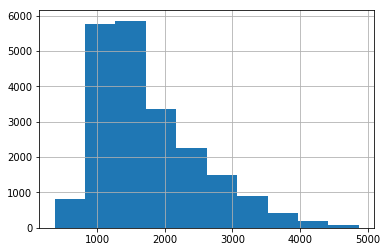

In [467]:
king_features.sqft_above.hist()

In [468]:
king_features.yr_built.unique()

array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
       1927, 1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985,
       1941, 1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000,
       1984, 2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973,
       1925, 1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
       1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1936, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907,
       1958, 2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970,
       2015, 1934, 1938, 1919, 1906, 1935])

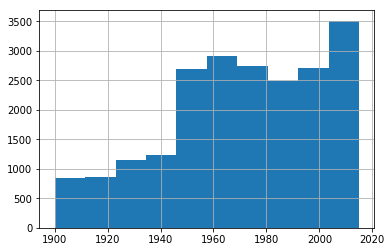

In [469]:
# Left skewed.
king_features.yr_built.hist()

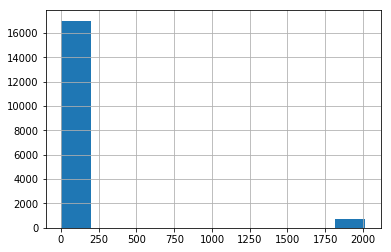

In [470]:
# Huge gap between data.  Just like 'sqft_basement'
data.yr_renovated.hist()

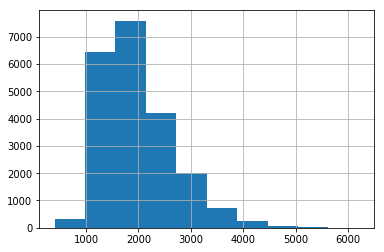

In [471]:
# Before
data.sqft_living15.hist()

In [472]:
king_features.sqft_living15.mean()+king_features.sqft_living15.std()*4

4628.899181741817

In [473]:
len(king_features.loc[king_features["sqft_living15"] > 4628])

36

In [474]:
# Let's get rid of the outliers
king_features = king_features[king_features.sqft_living15 < 4628]

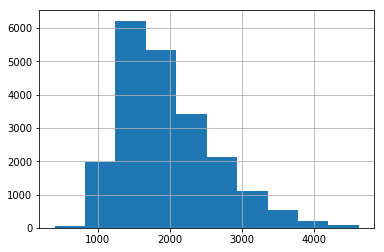

In [475]:
king_features.sqft_living15.hist()

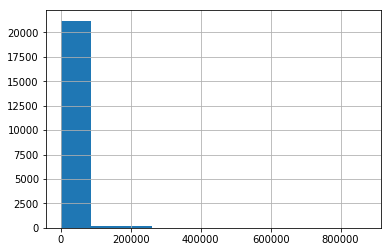

In [476]:
data.sqft_lot15.hist()

In [477]:
king_features.sqft_lot15.mean()+king_features.sqft_lot15.std()*4

77804.83494520822

In [478]:
len(king_features.loc[king_features["sqft_lot15"] > 77806])

207

In [479]:
# Let's get rid of the outliers
king_features = king_features[king_features.sqft_lot15 < 77806]

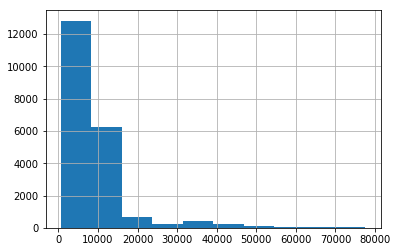

In [480]:
# After
king_features.sqft_lot15.hist()

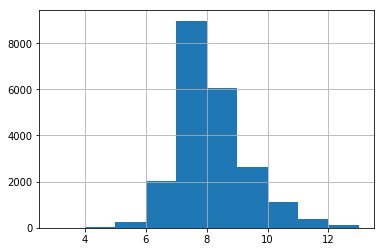

In [481]:
data.grade.hist()

In [482]:
king_features.grade.describe()

count    20874.000000
mean         7.617994
std          1.120787
min          3.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         12.000000
Name: grade, dtype: float64

In [483]:
king_features.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,2.087400e+04,20874.000000,20874.000000,20874.000000,20874.000000,20874.000000,20874.000000,20874.000000,20874.000000,20874.000000,20874.000000,20874.000000,20874.000000,20874.000000,20874.000000,20874.000000
mean,5.254867e+05,3.351873,2.089214,2031.459375,10346.953722,1.489389,0.006228,0.219316,3.413146,7.617994,1745.924931,279.900450,1970.630258,68.461962,1959.918990,9304.123838
std,3.245545e+05,0.870598,0.733864,830.081068,12710.792317,0.540370,0.078672,0.740321,0.651994,1.120787,758.217770,424.879149,29.448078,363.279551,652.549645,8642.487926
min,7.800000e+04,1.000000,0.500000,370.000000,520.000000,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,460.000000,651.000000
25%,3.200000e+05,3.000000,1.500000,1410.000000,5000.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1951.000000,0.000000,1480.000000,5040.000000
50%,4.480000e+05,3.000000,2.250000,1890.000000,7500.000000,1.500000,0.000000,0.000000,3.000000,7.000000,1540.000000,0.000000,1974.000000,0.000000,1820.000000,7513.000000
75%,6.350000e+05,4.000000,2.500000,2510.000000,10200.000000,2.000000,0.000000,0.000000,4.000000,8.000000,2160.000000,540.000000,1996.000000,0.000000,2330.000000,9800.000000
max,3.710000e+06,6.000000,5.250000,5635.000000,177657.000000,3.500000,1.000000,4.000000,5.000000,12.000000,4860.000000,2580.000000,2015.000000,2015.000000,4620.000000,77536.000000


In [484]:
# Create bins for 'yr_renovated' based on the values observed. 4 values will result in 3 bins
bins_A = [0, 1900,  2000, 2020]
bins_yr_renovated = pd.cut(king_features['yr_renovated'], bins_A)
bins_yr_renovated = bins_yr_renovated.cat.as_ordered()

yr_renovated_dummy = pd.get_dummies(bins_yr_renovated, prefix="yr-ren", drop_first=True)
king_features = king_features.drop(["yr_renovated"], axis=1)
king_features = pd.concat([king_features, yr_renovated_dummy], axis=1)

In [485]:
# Create bins for 'sqft_basement' based on the values observed. 3 values will result in 2 bins
bins_B = [0, 100, 5000]
bins_sqft_basement = pd.cut(king_features['sqft_basement'], bins_B)
bins_sqft_basement = bins_sqft_basement.cat.as_ordered()


sqft_basement_dummy = pd.get_dummies(bins_sqft_basement, prefix="sqft_base", drop_first=True)
king_features = king_features.drop(["sqft_basement"], axis=1)
king_features = pd.concat([king_features, sqft_basement_dummy], axis=1)

In [486]:
# Create bins for 'view' based on the values observed. 3 values will result in 2 bins
bins_C = [0, 2, 4]
bins_view = pd.cut(king_features['view'], bins_C)
bins_view = bins_view.cat.as_ordered()


view_dummy = pd.get_dummies(bins_view, prefix="new_view", drop_first=True)
king_features = king_features.drop(["view"], axis=1)
king_features = pd.concat([king_features, view_dummy], axis=1)

In [487]:
# Create bins for 'grade' based on the values observed. 3 values will result in 2 bins
bins_D = [0, 8, 13]
bins_grade = pd.cut(king_features['grade'], bins_D)
bins_grade = bins_grade.cat.as_ordered()


grade_dummy = pd.get_dummies(bins_grade, prefix="new_grade", drop_first=True)
king_features = king_features.drop(["grade"], axis=1)
king_features = pd.concat([king_features, grade_dummy], axis=1)

In [488]:
# Create bins for 'waterfront' based on the values observed. 3 values will result in 2 bins
bins_E = [0, 0.5, 1]
bins_waterfront = pd.cut(king_features['waterfront'], bins_E)
bins_waterfront = bins_waterfront.cat.as_ordered()


waterfront_dummy = pd.get_dummies(bins_waterfront, prefix="new_waterfront", drop_first=True)
king_features = king_features.drop(["waterfront"], axis=1)
king_features = pd.concat([king_features, waterfront_dummy], axis=1)

In [489]:
# Create bins for 'condition' based on the values observed. 4 values will result in 3 bins
bins_G = [0, 3, 4, 5]
bins_condition = pd.cut(king_features['condition'], bins_G)
bins_condition = bins_condition.cat.as_ordered()


condition_dummy = pd.get_dummies(bins_condition, prefix="new_condition", drop_first=True)
king_features = king_features.drop(["condition"], axis=1)
king_features = pd.concat([king_features, condition_dummy], axis=1)

### Log Transformation: These features have right skewed histograms
'sqft_above', 'sqft_lot', 'sqft_living', 'sqft_living15', 'sqft_lot15'

In [490]:
# Perform log transformation
logabove = np.log(king_features["sqft_above"])
loglot = np.log(king_features["sqft_lot"])
logliving = np.log(king_features["sqft_living"])
loglivingnear = np.log(king_features["sqft_living15"])
loglotnear = np.log(king_features["sqft_lot15"])

# Switch the Standardization into the original data
king_features["sqft_above"] = (logabove-np.mean(logabove))/np.sqrt(np.var(logabove))
king_features["sqft_lot"] = (loglot-np.mean(loglot))/np.sqrt(np.var(loglot))
king_features["sqft_living"] = (logliving-np.mean(logliving))/np.sqrt(np.var(logliving))
king_features["sqft_living15"] = (loglivingnear-np.mean(loglivingnear))/np.sqrt(np.var(loglivingnear))
king_features["sqft_lot15"] = (loglotnear-np.mean(loglotnear))/(np.sqrt(np.var(loglotnear)))

### Check the histograms of the log transformed/standardization:

Text(0.5, 1.0, 'sqft_lot15')

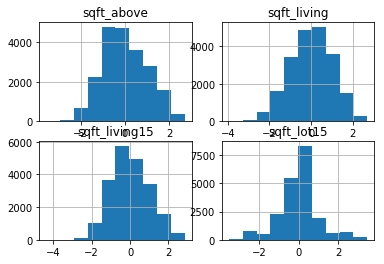

In [500]:
ax1 = plt.subplot(2, 2, 1)
king_features.sqft_above.hist(ax=ax1)
ax1.set_title("sqft_above")

ax2 = plt.subplot(2, 2, 2)
king_features.sqft_living.hist(ax=ax2)
ax2.set_title('sqft_living')

ax3 = plt.subplot(2, 2, 3)
king_features.sqft_living15.hist(ax=ax3)
ax3.set_title("sqft_living15")

ax4 = plt.subplot(2, 2, 4)
king_features.sqft_lot15.hist(ax=ax4)
ax4.set_title('sqft_lot15')

In [425]:
king_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20874 entries, 0 to 21596
Data columns (total 18 columns):
date                         20874 non-null datetime64[ns]
bedrooms                     20874 non-null int64
bathrooms                    20874 non-null float64
sqft_living                  20874 non-null float64
sqft_lot                     20874 non-null float64
floors                       20874 non-null float64
sqft_above                   20874 non-null float64
yr_built                     20874 non-null int64
sqft_living15                20874 non-null float64
sqft_lot15                   20874 non-null float64
yr-ren_(1900, 2000]          20874 non-null uint8
yr-ren_(2000, 2020]          20874 non-null uint8
sqft_base_(100, 5000]        20874 non-null uint8
new_view_(2, 4]              20874 non-null uint8
new_grade_(8, 13]            20874 non-null uint8
new_waterfront_(0.5, 1.0]    20874 non-null uint8
new_condition_(3, 4]         20874 non-null uint8
new_condition_(4, 

In [492]:
# "ValueError: The indices for endog and exog are not aligned" - if I use both 'data' and 'king_features'
#data.reindex(king_features.index)

y = pd.DataFrame(king_features, columns = ['price'])

X = king_features.drop(['date'], axis=1)

In [493]:
import statsmodels.api as sm
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.287e+33
Date:                Wed, 16 Oct 2019   Prob (F-statistic):               0.00
Time:                        12:44:59   Log-Likelihood:             4.3221e+05
No. Observations:               20874   AIC:                        -8.644e+05
Df Residuals:                   20856   BIC:                        -8.642e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
price                         1.0000   7.78e-18   1.29e+17      0.000       1.000       1.000
bedrooms                  -1.637e-11   2.62e-12     -6.245      0.000   -2.15e-11   -1.12e-11
bathrooms                 -1.019e-10   3.96e-12    -25.745      0.000    -1.1e-10   -9.41e-11
sqft_living                1.637e-11   7.13e-12      2.295      0.022    2.39e-12    3.04e-11
sqft_lot                  -5.457e-12   4.24e-12     -1.286      0.198   -1.38e-11    2.86e-12
floors                     2.365e-11   5.06e-12      4.677      0.000    1.37e-11    3.36e-11
sqft_above                 3.274e-11   7.03e-12      4.656      0.000     1.9e-11    4.65e-11
yr_built                   1.137e-13   6.99e-15     16.261      0.000       1e-13    1.27e-13
sqft_living15             -1.091e-11   2.81e-12     -3.879      0.000   -1.64e-11    -5.4e-12
sqft_lot15                 1.819e-12   4.19e-12      0.434      0.664   -6.39e-12       1e-11
yr-ren_(1900, 2000]        4.002e-11   1.29e-11      3.091      0.002    1.46e-11    6.54e-11
yr-ren_(2000, 2020]        2.983e-10   1.37e-11     21.729      0.000    2.71e-10    3.25e-10
sqft_base_(100, 5000]      4.775e-11   7.21e-12      6.618      0.000    3.36e-11    6.19e-11
new_view_(2, 4]           -4.002e-11   1.06e-11     -3.790      0.000   -6.07e-11   -1.93e-11
new_grade_(8, 13]         -6.185e-11   6.07e-12    -10.195      0.000   -7.37e-11      -5e-11
new_waterfront_(0.5, 1.0] -2.274e-10   2.42e-11     -9.378      0.000   -2.75e-10    -1.8e-10
new_condition_(3, 4]       2.183e-11   4.19e-12      5.206      0.000    1.36e-11       3e-11
new_condition_(4, 5]       -2.91e-11   6.67e-12     -4.362      0.000   -4.22e-11    -1.6e-11
==============================================================================
Omnibus:                     9384.044   Durbin-Watson:                   0.586
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            67951.011
Skew:                          -2.024   Prob(JB):                         0.00
Kurtosis:                      10.858   Cond. No.                     8.90e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.9e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [494]:
# Perform a train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
# A brief preview of our train test split
print(len(X_train), len(X_test), len(y_train), len(y_test))

15655 5219 15655 5219


In [495]:
# Apply your model to the train set
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [496]:
# Calculate predictions on training and test sets
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

# Calculate training and test residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [497]:
#Calculate the Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 1.3864895917661643e-20
Test Mean Squarred Error: 1.3853386961773474e-20


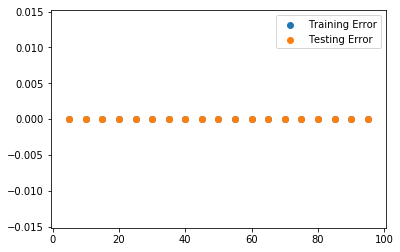

In [498]:
#Evaluate the effect of train-test split 
import random
random.seed(8)
train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    temp_train_err = []
    temp_test_err = []
    for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
        linreg.fit(X_train, y_train)
        y_hat_train = linreg.predict(X_train)
        y_hat_test = linreg.predict(X_test)
        temp_train_err.append(mean_squared_error(y_train, y_hat_train))
        temp_test_err.append(mean_squared_error(y_test, y_hat_test))
    train_err.append(np.mean(temp_train_err))
    test_err.append(np.mean(temp_test_err))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

In [499]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results  = np.mean(cross_val_score(linreg, X, y, cv=5,  scoring='neg_mean_squared_error'))
cv_5_results

-5.402388233961796e-20

## Results

###### Yeah, a perfect R^2 = 1.  Looks like I'm done!


# Column Names and descriptions for Kings County Data Set
* **id**                    Drop - categorical data, has no meaning
* **dateDate**              Object - need to change format or categorize by month or year
* **pricePrice** -          Independent Variable
* **bedroomsNumber** -      Has an outlier of 33. Either drop this row or change it to the median '3'
* **bathroomsNumber** -     Continuous
* **sqft_livingsquare** -   Continuous but could effect multicolinearity
* **sqft_lotsquare** -      Continuous but could also effect multicolinearity
* **floorsTotal** -         Categorical 
* **waterfront** -          Has missing data, lots of zeros, and is categorical - drop or clean up and bin
* **view** -                Also has missing data, is categorical - clean up and bin
* **condition** -           Categorical - could be binned
* **grade** -               Categorical - could be binned
* **sqft_above** -          Continuous but could effect multilinearity - probably going to drop
* **sqft_basement** -       Missing data, has many "?", and is an object. 
* **yr_built** -            Continuous
* **yr_renovated** -        Has lots of zeros
* **zipcode** -             Categorical data - could be dropped or binned based on location.
* **lat** -                 
* **long** -                
* **sqft_living15** -       Continuous but with outliers - also could effect multicoliniarity.
* **sqft_lot15** -          Continuous but with outliers - also could effect multicoliniarity.

https://www.geeksforgeeks.org/python-how-and-where-to-apply-feature-scaling/
Normalisation should be performed when the scale of a feature is irrelevant or misleading and not should Normalise when the scale is meaningful.